<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7
# This is binary classification dataset. 
# The values in "Class variable" have two (binary) values.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 Download the "diabetes" dataset to local system** 
---

In [5]:
diabetesDataSet.to_csv("diabetesDataSet.csv")
from google.colab import files
#files.download('diabetesDataSet.csv')            # Uncomment this line       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **1.4 "Parameter setting"  for all classification models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [6]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', train_size=0.7, silent=True)

,Description,Value
0,session_id,4282
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


---
### **1.5 "Run and Compare" the model performance**
---

In [7]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7597,0.8202,0.5380,0.7258,0.6058,0.4406,0.4589,0.523
rf,Random Forest Classifier,0.7524,0.8102,0.5433,0.6903,0.6017,0.4276,0.4374,0.518
gbc,Gradient Boosting Classifier,0.7469,0.8070,0.5813,0.6611,0.6120,0.4274,0.4333,0.128
et,Extra Trees Classifier,0.7446,0.7810,0.5111,0.6936,0.5786,0.4036,0.4191,0.466
ridge,Ridge Classifier,0.7411,0.0000,0.5170,0.6886,0.5769,0.3987,0.4160,0.017
lda,Linear Discriminant Analysis,0.7411,0.8171,0.5222,0.6862,0.5799,0.4004,0.4168,0.017
lightgbm,Light Gradient Boosting Machine,0.7393,0.7982,0.5912,0.6431,0.6076,0.4156,0.4214,0.094
ada,Ada Boost Classifier,0.7339,0.7846,0.5754,0.6314,0.6012,0.4025,0.4041,0.109
dt,Decision Tree Classifier,0.7263,0.6976,0.6015,0.6202,0.6055,0.3973,0.4014,0.017
knn,K Neighbors Classifier,0.7169,0.7313,0.5053,0.6243,0.5553,0.3516,0.3579,0.118


---
### **1.6 "Three line of code" for model comparison for "Cancer" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
s = setup(data = cancerDataSet, target='Class', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9645,0.9908,0.9570,0.9418,0.9486,0.9215,0.9224,0.490
et,Extra Trees Classifier,0.9645,0.9910,0.9691,0.9309,0.9490,0.9217,0.9229,0.464
lightgbm,Light Gradient Boosting Machine,0.9645,0.9924,0.9507,0.9483,0.9480,0.9211,0.9228,0.048
lr,Logistic Regression,0.9624,0.9897,0.9441,0.9479,0.9448,0.9162,0.9176,0.026
ridge,Ridge Classifier,0.9582,0.0000,0.9324,0.9469,0.9381,0.9065,0.9081,0.018
gbc,Gradient Boosting Classifier,0.9540,0.9864,0.9320,0.9349,0.9321,0.8973,0.8989,0.127
knn,K Neighbors Classifier,0.9498,0.9811,0.8827,0.9679,0.9216,0.8849,0.8885,0.120
lda,Linear Discriminant Analysis,0.9498,0.9852,0.9077,0.9458,0.9240,0.8866,0.8893,0.026
svm,SVM - Linear Kernel,0.9477,0.0000,0.9136,0.9323,0.9215,0.8824,0.8838,0.021
nb,Naive Bayes,0.9456,0.9705,0.9316,0.9173,0.9205,0.8792,0.8836,0.018


---
### **1.7 "Three line of code" for model comparison for "Heart Disease" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.classification import *

heartDiseaseDataSet = get_data("heart_disease")
s = setup(data = heartDiseaseDataSet, target='Disease', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8725,0.0000,0.8125,0.9039,0.8510,0.7402,0.7492,0.014
lda,Linear Discriminant Analysis,0.8617,0.8936,0.8125,0.8796,0.8400,0.7186,0.7264,0.017
et,Extra Trees Classifier,0.8558,0.9014,0.7778,0.8920,0.8251,0.7053,0.7161,0.463
lr,Logistic Regression,0.8512,0.8982,0.8014,0.8627,0.8286,0.6976,0.7014,0.127
gbc,Gradient Boosting Classifier,0.8404,0.8766,0.7750,0.8729,0.8108,0.6743,0.6875,0.083
lightgbm,Light Gradient Boosting Machine,0.8301,0.8838,0.7778,0.8583,0.8047,0.6551,0.6716,0.029
rf,Random Forest Classifier,0.8243,0.8941,0.7403,0.8681,0.7871,0.6404,0.6577,0.464
nb,Naive Bayes,0.8091,0.8605,0.7514,0.8077,0.7756,0.6090,0.6132,0.015
ada,Ada Boost Classifier,0.7988,0.8297,0.7694,0.7925,0.7749,0.5944,0.6017,0.098
dt,Decision Tree Classifier,0.7292,0.7263,0.6944,0.7163,0.6992,0.4542,0.4596,0.015


---
# **2. Classification: working with user dataset**
---
### **2.1 Uploading "user file" from user system**

In [10]:
from google.colab import files
#files.upload()                     # Uncomment this line

---
### **2.2 "Read" the uploaded file**
---

In [11]:
import pandas as pd
#myDataSet = pd.read_csv('Sample5 - Brest Cancer.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                             # Uncomment this line

---
### **2.3 "Compare" the model performance**
---

In [12]:
from pycaret.classification import *

#s = setup(data = myDataSet, target='Cancer', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

---
### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [13]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [14]:
s = setup(data=diabetesDataSet, target='Class variable', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7525,0.0000,0.5246,0.7074,0.5922,0.4216,0.4375,0.015
lr,Logistic Regression,0.7507,0.8032,0.5412,0.6943,0.5982,0.4232,0.4363,0.030
lda,Linear Discriminant Analysis,0.7469,0.7993,0.5298,0.6960,0.5891,0.4129,0.4289,0.017
rf,Random Forest Classifier,0.7393,0.7891,0.5023,0.6776,0.5641,0.3877,0.4025,0.513
gbc,Gradient Boosting Classifier,0.7374,0.7962,0.5719,0.6446,0.5955,0.4044,0.4126,0.131
knn,K Neighbors Classifier,0.7338,0.7258,0.5135,0.6520,0.5669,0.3813,0.3904,0.116
et,Extra Trees Classifier,0.7299,0.7555,0.4646,0.6601,0.5369,0.3577,0.3721,0.461
lightgbm,Light Gradient Boosting Machine,0.7149,0.7656,0.5240,0.6206,0.5578,0.3522,0.3609,0.050
svm,SVM - Linear Kernel,0.7111,0.0000,0.5664,0.5890,0.5695,0.3554,0.3600,0.016
ada,Ada Boost Classifier,0.7038,0.7649,0.5284,0.5811,0.5497,0.3309,0.3339,0.114


---
### **3.2 Model performance using "Feature Selection"**
---

In [15]:
s = setup(data=diabetesDataSet, target='Class variable', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7707,0.8179,0.5675,0.7073,0.6248,0.4636,0.4726,0.240
lda,Linear Discriminant Analysis,0.7651,0.8159,0.5404,0.6980,0.6045,0.4434,0.4532,0.018
ridge,Ridge Classifier,0.7633,0.0000,0.5351,0.6947,0.5998,0.4381,0.4480,0.015
rf,Random Forest Classifier,0.7558,0.7962,0.5336,0.6844,0.5974,0.4263,0.4346,0.515
gbc,Gradient Boosting Classifier,0.7522,0.7971,0.5667,0.6593,0.6062,0.4278,0.4325,0.134
et,Extra Trees Classifier,0.7354,0.7878,0.4737,0.6651,0.5487,0.3694,0.3829,0.464
knn,K Neighbors Classifier,0.7334,0.7455,0.5287,0.6353,0.5711,0.3820,0.3886,0.118
ada,Ada Boost Classifier,0.7299,0.7776,0.5395,0.6289,0.5748,0.3804,0.3863,0.115
lightgbm,Light Gradient Boosting Machine,0.7168,0.7716,0.5450,0.5946,0.5641,0.3564,0.3602,0.050
nb,Naive Bayes,0.6629,0.7381,0.1760,0.5306,0.2563,0.1052,0.1356,0.016


---
### **3.3 Model performance using "Outlier Removal"**
---

In [16]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7686,0.8122,0.5191,0.6881,0.5875,0.4313,0.4424,0.230
lda,Linear Discriminant Analysis,0.7627,0.8077,0.5191,0.6770,0.5822,0.4206,0.4316,0.017
ridge,Ridge Classifier,0.7608,0.0000,0.5066,0.6748,0.5742,0.4125,0.4237,0.014
gbc,Gradient Boosting Classifier,0.7549,0.8054,0.5382,0.6490,0.5823,0.4120,0.4201,0.125
rf,Random Forest Classifier,0.7510,0.8178,0.5199,0.6467,0.5702,0.3986,0.4076,0.507
et,Extra Trees Classifier,0.7510,0.7964,0.4824,0.6597,0.5523,0.3860,0.3983,0.463
ada,Ada Boost Classifier,0.7314,0.7630,0.5199,0.5936,0.5498,0.3607,0.3651,0.115
lightgbm,Light Gradient Boosting Machine,0.7275,0.7841,0.5199,0.5941,0.5472,0.3553,0.3617,0.049
knn,K Neighbors Classifier,0.7176,0.7271,0.4827,0.5690,0.5131,0.3200,0.3266,0.117
nb,Naive Bayes,0.7157,0.7432,0.5132,0.5783,0.5321,0.3313,0.3397,0.015


---
### **3.4 Model performance using "Transformation"**
---

In [17]:
s = setup(data=diabetesDataSet, target='Class variable', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7634,0.0000,0.5056,0.7122,0.5857,0.4278,0.4433,0.015
lda,Linear Discriminant Analysis,0.7634,0.8177,0.5222,0.7072,0.5943,0.4335,0.4473,0.017
lr,Logistic Regression,0.7633,0.8185,0.5111,0.7109,0.5863,0.4287,0.4444,0.026
rf,Random Forest Classifier,0.7595,0.7967,0.5389,0.6953,0.5936,0.4295,0.4439,0.514
et,Extra Trees Classifier,0.7504,0.7726,0.5278,0.6599,0.5792,0.4075,0.4162,0.464
gbc,Gradient Boosting Classifier,0.7447,0.7901,0.5167,0.6507,0.5615,0.3906,0.4019,0.126
ada,Ada Boost Classifier,0.7410,0.7591,0.5556,0.6317,0.5824,0.3985,0.4050,0.113
knn,K Neighbors Classifier,0.7299,0.7195,0.4389,0.6459,0.5167,0.3407,0.3556,0.121
lightgbm,Light Gradient Boosting Machine,0.7243,0.7801,0.5500,0.6059,0.5616,0.3661,0.3743,0.049
svm,SVM - Linear Kernel,0.7208,0.0000,0.5000,0.6186,0.5308,0.3429,0.3576,0.019


---
### **3.5 Model performance using "PCA"**
---

In [18]:
s = setup(data=diabetesDataSet, target='Class variable', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7544,0.8122,0.5310,0.6925,0.5968,0.4255,0.4359,0.023
lda,Linear Discriminant Analysis,0.7507,0.8103,0.5149,0.6886,0.5841,0.4128,0.4245,0.016
ridge,Ridge Classifier,0.7488,0.0000,0.5041,0.6886,0.5767,0.4059,0.4187,0.014
nb,Naive Bayes,0.7412,0.7910,0.5088,0.6666,0.5719,0.3924,0.4028,0.015
qda,Quadratic Discriminant Analysis,0.7356,0.7888,0.4982,0.6489,0.5603,0.3778,0.3859,0.016
gbc,Gradient Boosting Classifier,0.7301,0.7721,0.5249,0.6374,0.5731,0.3787,0.3843,0.115
ada,Ada Boost Classifier,0.7114,0.7474,0.5096,0.5917,0.5447,0.3368,0.3402,0.108
et,Extra Trees Classifier,0.7113,0.7476,0.4822,0.6107,0.5353,0.3310,0.3378,0.462
rf,Random Forest Classifier,0.7059,0.7595,0.4985,0.5925,0.5397,0.3262,0.3299,0.515
knn,K Neighbors Classifier,0.7039,0.7314,0.4927,0.5888,0.5318,0.3193,0.3244,0.117


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [19]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7882,0.8285,0.5771,0.7621,0.6524,0.5042,0.5174,0.026
lda,Linear Discriminant Analysis,0.7804,0.8254,0.5830,0.7377,0.6461,0.4903,0.5012,0.019
ridge,Ridge Classifier,0.7765,0.0000,0.5598,0.7384,0.6334,0.4767,0.4887,0.015
ada,Ada Boost Classifier,0.7667,0.7931,0.6284,0.6762,0.6492,0.4748,0.4772,0.110
rf,Random Forest Classifier,0.7588,0.8114,0.5549,0.6898,0.6136,0.4411,0.4477,0.512
gbc,Gradient Boosting Classifier,0.7569,0.8219,0.5771,0.6748,0.6192,0.4425,0.4476,0.124
knn,K Neighbors Classifier,0.7451,0.7895,0.5376,0.6623,0.5911,0.4090,0.4153,0.119
nb,Naive Bayes,0.7412,0.7623,0.5137,0.6631,0.5736,0.3929,0.4030,0.016
svm,SVM - Linear Kernel,0.7392,0.0000,0.5778,0.6587,0.5897,0.4073,0.4225,0.018
et,Extra Trees Classifier,0.7392,0.7913,0.5085,0.6617,0.5722,0.3893,0.3981,0.464


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [20]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7686,0.8373,0.5873,0.7011,0.6359,0.4688,0.4747,0.024
et,Extra Trees Classifier,0.7686,0.8102,0.5366,0.7215,0.6130,0.4542,0.4654,0.463
ridge,Ridge Classifier,0.7647,0.0000,0.5758,0.6959,0.6274,0.4581,0.4641,0.015
lda,Linear Discriminant Analysis,0.7588,0.8307,0.5814,0.6774,0.6232,0.4479,0.4521,0.017
rf,Random Forest Classifier,0.7529,0.8262,0.5533,0.6832,0.6080,0.4307,0.4381,0.514
knn,K Neighbors Classifier,0.7490,0.7626,0.5186,0.6826,0.5884,0.4126,0.4215,0.121
gbc,Gradient Boosting Classifier,0.7392,0.8204,0.5706,0.6491,0.6054,0.4117,0.4152,0.127
svm,SVM - Linear Kernel,0.7353,0.0000,0.6036,0.6304,0.6105,0.4113,0.4164,0.016
lightgbm,Light Gradient Boosting Machine,0.7333,0.8118,0.5752,0.6300,0.5950,0.3980,0.4029,0.053
nb,Naive Bayes,0.7216,0.7753,0.5268,0.6123,0.5617,0.3611,0.3667,0.017


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [21]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8511,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.7593,0.7474,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.6852,0.7406,0.4737,0.5625,0.5143,0.2839,0.2862
3,0.8519,0.8992,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7593,0.8571,0.5263,0.7143,0.6061,0.4384,0.4490
5,0.7593,0.8105,0.5263,0.7143,0.6061,0.4384,0.4490
6,0.8148,0.8728,0.6000,0.8571,0.7059,0.5768,0.5963
7,0.6792,0.6641,0.4211,0.5714,0.4848,0.2597,0.2660
8,0.7547,0.8382,0.5789,0.6875,0.6286,0.4475,0.4512
9,0.7547,0.7972,0.5263,0.7143,0.6061,0.4339,0.4445


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [22]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [23]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.86
1,1,85,66,29,0,26.6,0.351,31,0,0,0.80
2,8,183,64,0,0,23.3,0.672,32,1,1,0.84
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.89
5,5,116,74,0,0,25.6,0.201,30,0,0,0.97
6,3,78,50,32,88,31.0,0.248,26,1,1,0.70
7,10,115,0,0,0,35.3,0.134,29,0,0,0.87
8,2,197,70,45,543,30.5,0.158,53,1,1,0.67
9,8,125,96,0,0,0.0,0.232,54,1,0,0.78


---
### **4.5 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.6 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.7 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **4.8 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.9  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.9.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

---
### **4.9.2 Load the "Model"**
---

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

---
### **4.9.3 Make the prediction on "new unseen dataset"**
---

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.86
1,1,85,66,29,0,26.6,0.351,31,0,0,0.80
2,8,183,64,0,0,23.3,0.672,32,1,1,0.84
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.89
5,5,116,74,0,0,25.6,0.201,30,0,0,0.97
6,3,78,50,32,88,31.0,0.248,26,1,1,0.70
7,10,115,0,0,0,35.3,0.134,29,0,0,0.87
8,2,197,70,45,543,30.5,0.158,53,1,1,0.67
9,8,125,96,0,0,0.0,0.232,54,1,0,0.78


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8511,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.7593,0.7474,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.6852,0.7406,0.4737,0.5625,0.5143,0.2839,0.2862
3,0.8519,0.8992,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7593,0.8571,0.5263,0.7143,0.6061,0.4384,0.4490
5,0.7593,0.8105,0.5263,0.7143,0.6061,0.4384,0.4490
6,0.8148,0.8728,0.6000,0.8571,0.7059,0.5768,0.5963
7,0.6792,0.6641,0.4211,0.5714,0.4848,0.2597,0.2660
8,0.7547,0.8382,0.5789,0.6875,0.6286,0.4475,0.4512
9,0.7547,0.7972,0.5263,0.7143,0.6061,0.4339,0.4445


---
### **5.2 Create "Confusion Matrix"**
---

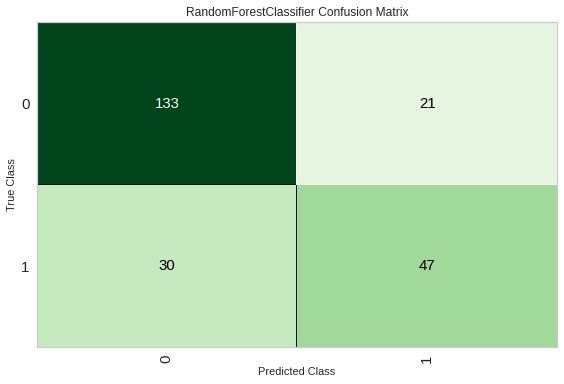

In [32]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

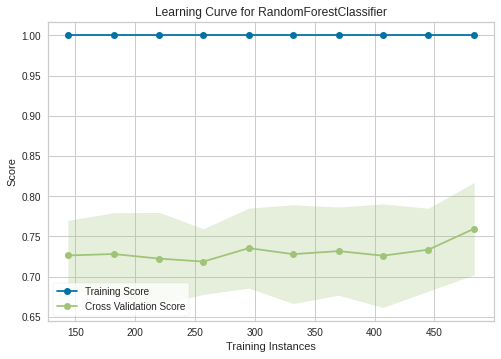

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

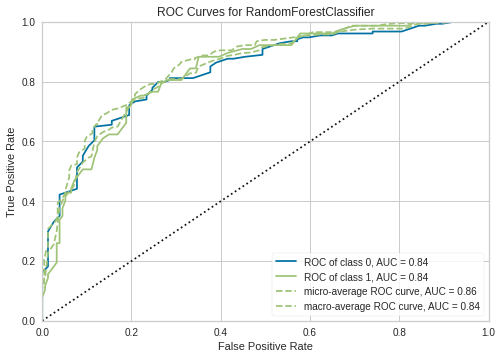

In [34]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

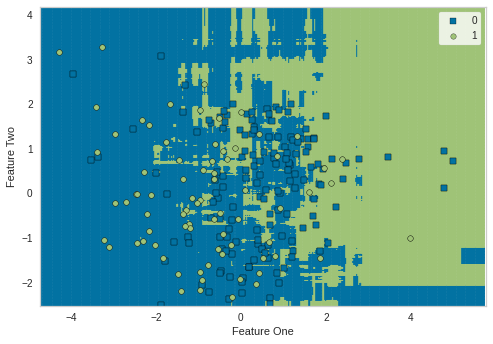

In [35]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [36]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


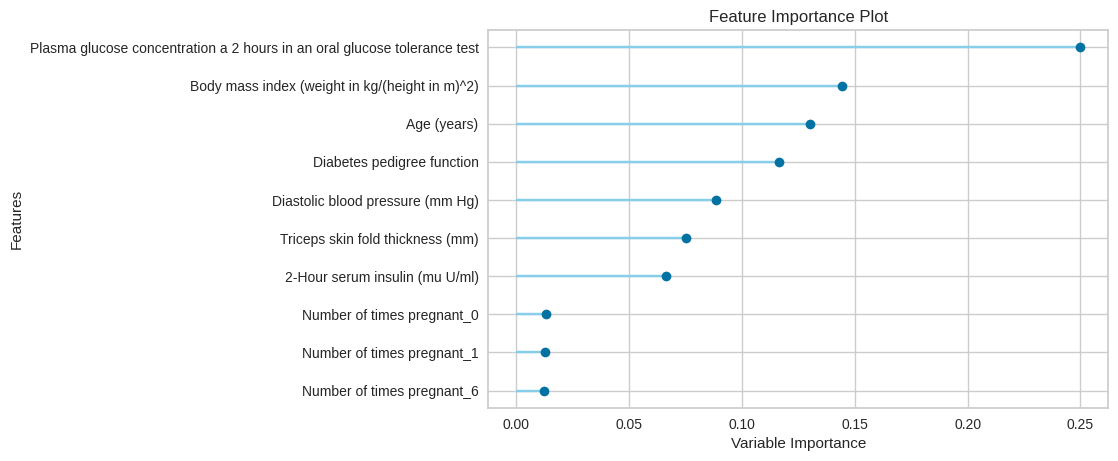

In [37]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

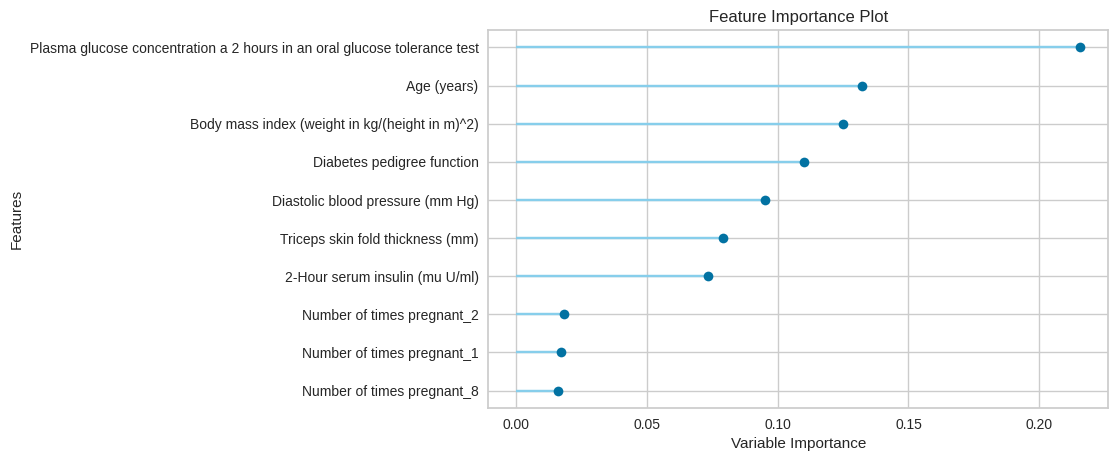

In [38]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

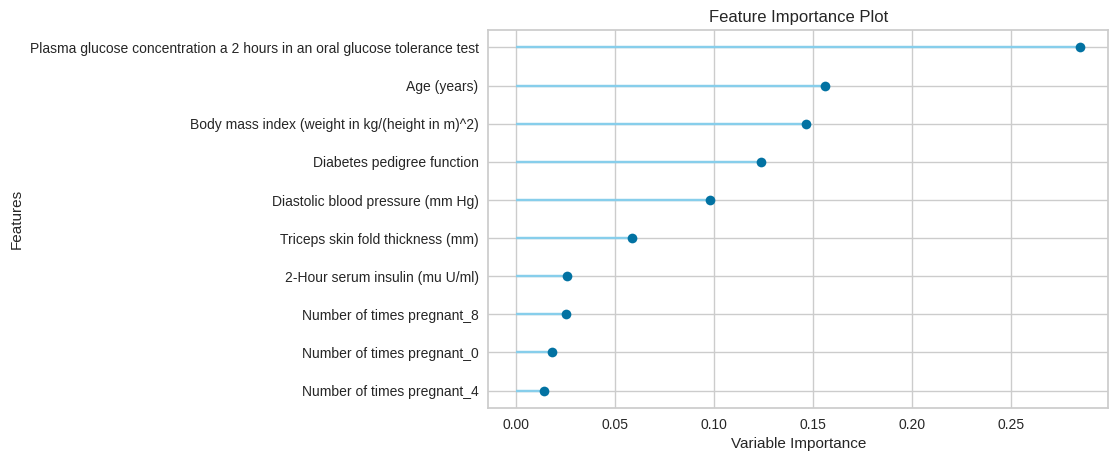

In [39]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [40]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.6368,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.6296,0.5459,0.2632,0.4545,0.3333,0.1015,0.1088
2,0.5926,0.5534,0.4211,0.4211,0.4211,0.1068,0.1068
3,0.7037,0.6992,0.6842,0.5652,0.6190,0.3802,0.3848
4,0.7037,0.6992,0.6842,0.5652,0.6190,0.3802,0.3848
5,0.6296,0.6060,0.5263,0.4762,0.5000,0.2070,0.2077
6,0.8333,0.7956,0.6500,0.8667,0.7429,0.6233,0.6374
7,0.6038,0.5751,0.4737,0.4500,0.4615,0.1484,0.1486
8,0.6415,0.6277,0.5789,0.5000,0.5366,0.2468,0.2486
9,0.6415,0.6045,0.4737,0.5000,0.4865,0.2114,0.2116


#### **Get the "parameters" of Decision Tree**

In [41]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


---
### **7.2 Tune "Decision Tree" model**
---

In [42]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7594,0.2632,0.6250,0.3704,0.2045,0.2385
1,0.7407,0.6932,0.3684,0.7778,0.5000,0.3538,0.3989
2,0.6667,0.7038,0.5263,0.5263,0.5263,0.2692,0.2692
3,0.7593,0.8143,0.6316,0.6667,0.6486,0.4658,0.4661
4,0.7407,0.8301,0.2632,1.0000,0.4167,0.3165,0.4336
5,0.7222,0.7444,0.3684,0.7000,0.4828,0.3170,0.3476
6,0.8333,0.8478,0.5500,1.0000,0.7097,0.6062,0.6595
7,0.6226,0.6796,0.4737,0.4737,0.4737,0.1796,0.1796
8,0.7170,0.8382,0.3684,0.7000,0.4828,0.3129,0.3434
9,0.6792,0.7492,0.7368,0.5385,0.6222,0.3550,0.3683


#### **Get the "tuned parameters" of Decision Tree**

In [43]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,3
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0002
min_impurity_split,None
min_samples_leaf,5
min_samples_split,10


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html">Click Here</a>**
